# Combine Hourly Observations and IMS Snow Cover

IMS Snow Cover is combined with hourly processed ASOS data

In [39]:
import pandas as pd
import numpy as np

from ros_database.filepath import SURFOBS_HOURLY_PATH, IMS_PATH, SURFOBS_COMBINED_PATH
from ros_database.processing.surface import load_hourly_observations

from ros_database.processing.combine_hourly_with_ims_snowcover import load_snow_cover_for_stations, reindex_snow_cover

In [2]:
snow_cover = load_snow_cover_for_stations()

In [10]:
snow_cover['PAFM']

time
2004-02-25    True
2004-02-26    True
2004-02-27    True
2004-02-28    True
2004-02-29    True
              ... 
2024-02-09    True
2024-02-10    True
2024-02-11    True
2024-02-12    True
2024-02-13    True
Name: PAFM, Length: 7275, dtype: bool

<Axes: xlabel='time'>

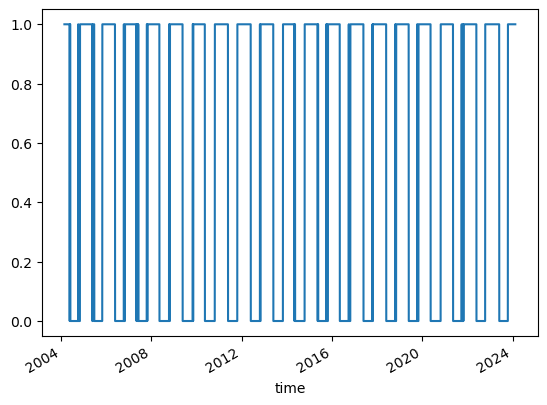

In [11]:
(snow_cover['PAFM']*1).plot()

In [12]:
hourly_filepath = list(SURFOBS_HOURLY_PATH.glob("*.csv"))

In [13]:
fp = hourly_filepath[0]
df = load_hourly_observations(fp)
df

,station,t2m,d2m,relh,mslp,psurf,p01i,UP,RA,FZRA,SOLID,wspd,drct
datetime,,,,,,,,,,,,,
1988-01-05 14:00:00,PAFM,-7.1,-11.6,70.24,NaN,1017.6,NaN,NaN,NaN,NaN,NaN,3.09,90.0
1988-01-05 15:00:00,PAFM,-9.3,-13.8,69.77,NaN,1017.3,NaN,NaN,NaN,NaN,NaN,3.09,0.0
1988-01-05 16:00:00,PAFM,-11.6,-15.6,72.81,NaN,1017.3,NaN,NaN,NaN,NaN,NaN,2.58,340.0
1988-01-05 17:00:00,PAFM,-11.6,-16.0,69.85,NaN,1017.3,NaN,NaN,NaN,NaN,NaN,2.57,320.1
1988-01-05 18:00:00,PAFM,-11.6,-16.0,69.85,NaN,1016.9,NaN,NaN,NaN,NaN,NaN,2.06,349.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-12 20:00:00,PAFM,-10.0,-11.1,91.57,1015.5,1014.9,0.0,NaN,NaN,NaN,NaN,5.09,124.5
2023-11-12 21:00:00,PAFM,-8.9,-10.6,87.70,1014.7,1014.2,0.0,NaN,NaN,NaN,NaN,4.87,122.5
2023-11-12 22:00:00,PAFM,-8.9,-10.6,87.70,1013.6,1013.0,0.0,NaN,NaN,NaN,NaN,5.81,120.9


In [15]:
df["sog"] = reindex_snow_cover(snow_cover["PAFM"], df.index)

In [16]:
df

,station,t2m,d2m,relh,mslp,psurf,p01i,UP,RA,FZRA,SOLID,wspd,drct,sog
datetime,,,,,,,,,,,,,,
1988-01-05 14:00:00,PAFM,-7.1,-11.6,70.24,NaN,1017.6,NaN,NaN,NaN,NaN,NaN,3.09,90.0,NaN
1988-01-05 15:00:00,PAFM,-9.3,-13.8,69.77,NaN,1017.3,NaN,NaN,NaN,NaN,NaN,3.09,0.0,NaN
1988-01-05 16:00:00,PAFM,-11.6,-15.6,72.81,NaN,1017.3,NaN,NaN,NaN,NaN,NaN,2.58,340.0,NaN
1988-01-05 17:00:00,PAFM,-11.6,-16.0,69.85,NaN,1017.3,NaN,NaN,NaN,NaN,NaN,2.57,320.1,NaN
1988-01-05 18:00:00,PAFM,-11.6,-16.0,69.85,NaN,1016.9,NaN,NaN,NaN,NaN,NaN,2.06,349.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-12 20:00:00,PAFM,-10.0,-11.1,91.57,1015.5,1014.9,0.0,NaN,NaN,NaN,NaN,5.09,124.5,True
2023-11-12 21:00:00,PAFM,-8.9,-10.6,87.70,1014.7,1014.2,0.0,NaN,NaN,NaN,NaN,4.87,122.5,True
2023-11-12 22:00:00,PAFM,-8.9,-10.6,87.70,1013.6,1013.0,0.0,NaN,NaN,NaN,NaN,5.81,120.9,True


<Axes: xlabel='datetime'>

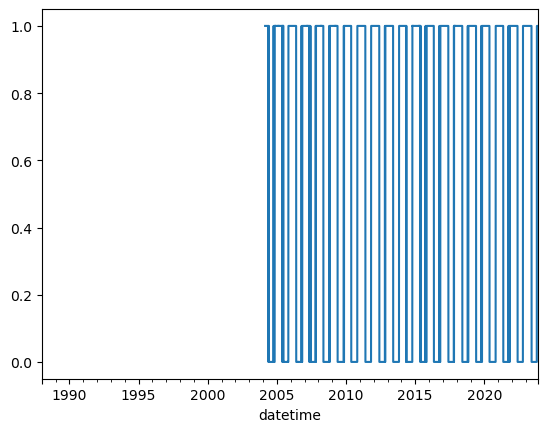

In [17]:
(df.sog * 1).plot()

In [18]:
df[df.sog & df.RA]

,station,t2m,d2m,relh,mslp,psurf,p01i,UP,RA,FZRA,SOLID,wspd,drct,sog
datetime,,,,,,,,,,,,,,
2016-09-28 12:00:00,PAFM,1.7,-1.1,81.65,1018.0,1017.2,0.0,False,True,False,True,4.31,88.3,True
2016-09-28 13:00:00,PAFM,1.1,0.0,92.36,1016.7,1015.5,0.4,False,True,False,True,4.39,118.8,True
2016-09-28 14:00:00,PAFM,1.0,0.0,92.81,1015.5,1014.5,0.4,False,True,False,False,6.15,124.5,True
2016-09-28 15:00:00,PAFM,0.9,0.0,93.94,1014.5,1013.6,1.0,False,True,False,True,7.50,132.4,True
2016-09-28 16:00:00,PAFM,1.0,0.5,96.50,1013.2,1012.4,1.5,True,True,False,True,7.94,120.9,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-31 16:00:00,PAFM,0.9,0.0,94.04,1019.2,1018.6,0.1,True,True,False,False,1.80,149.2,True
2023-10-31 21:00:00,PAFM,0.3,0.0,98.03,NaN,1019.6,0.0,False,True,False,False,0.90,152.4,True
2023-10-31 22:00:00,PAFM,0.6,0.0,96.06,1020.4,1019.6,0.0,False,True,False,False,1.70,138.2,True


In [30]:
def reindex_snow_cover(snow_cover, index):
    return snow_cover.reindex(index, method="ffill", limit=24)

def combine_with_snow_cover(fp, snow_cover):
    """Combines hourly data with snow cover"""
    df = load_hourly_observations(fp)
    df["sog"] = reindex_snow_cover(snow_cover, df.index)
    return df

In [31]:
combine_with_snow_cover(fp, snow_cover["PAFM"])

,station,t2m,d2m,relh,mslp,psurf,p01i,UP,RA,FZRA,SOLID,wspd,drct,sog
datetime,,,,,,,,,,,,,,
1988-01-05 14:00:00,PAFM,-7.1,-11.6,70.24,NaN,1017.6,NaN,NaN,NaN,NaN,NaN,3.09,90.0,NaN
1988-01-05 15:00:00,PAFM,-9.3,-13.8,69.77,NaN,1017.3,NaN,NaN,NaN,NaN,NaN,3.09,0.0,NaN
1988-01-05 16:00:00,PAFM,-11.6,-15.6,72.81,NaN,1017.3,NaN,NaN,NaN,NaN,NaN,2.58,340.0,NaN
1988-01-05 17:00:00,PAFM,-11.6,-16.0,69.85,NaN,1017.3,NaN,NaN,NaN,NaN,NaN,2.57,320.1,NaN
1988-01-05 18:00:00,PAFM,-11.6,-16.0,69.85,NaN,1016.9,NaN,NaN,NaN,NaN,NaN,2.06,349.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-12 20:00:00,PAFM,-10.0,-11.1,91.57,1015.5,1014.9,0.0,NaN,NaN,NaN,NaN,5.09,124.5,True
2023-11-12 21:00:00,PAFM,-8.9,-10.6,87.70,1014.7,1014.2,0.0,NaN,NaN,NaN,NaN,4.87,122.5,True
2023-11-12 22:00:00,PAFM,-8.9,-10.6,87.70,1013.6,1013.0,0.0,NaN,NaN,NaN,NaN,5.81,120.9,True


## Execution

This workflow is executed in the script `ros_database.processing.combine_hourly_with_ims_snowcover`.

```
$ python -m ros_database.processing.combine_hourly_with_ims_snowcover
```

## Examine results

In [19]:
combo_fp = list(SURFOBS_COMBINED_PATH.glob("*.csv"))

In [40]:
from ros_database.processing.combine_hourly_with_ims_snowcover import get_station_id

def count_rain_on_snow(df):
    if not df['sog'].isnull().all():
        count = df[df.sog & df.RA].count()['sog']
    else:
        count = np.nan
    return count

def count_melt_hours_with_sog(df):
    if not df['sog'].isnull().all():
        count = df[df.sog & (df.t2m > 0.)].count()['sog']
    else:
        count = np.nan
    return count


In [44]:
counts = []
for fp in combo_fp:
    df = load_hourly_observations(fp)
    counts.append(
        (
            get_station_id(df),
            count_rain_on_snow(df),
            count_melt_hours_with_sog(df),
        )
    )

counts

[('CYDB', 362, 11034),
 ('PADQ', nan, nan),
 ('ENFL', nan, nan),
 ('EFMA', 2121, 11594),
 ('PAHX', 1095, 6243),
 ('PAIN', 812, 16974),
 ('ULMM', 3486, 22838),
 ('PALG', 1385, 12679),
 ('EFMI', 4086, 16898),
 ('CYUX', 1418, 10173),
 ('PACM', nan, nan),
 ('EFIV', 3144, 19311),
 ('PAFM', 716, 11243),
 ('PAKV', 2027, 11880),
 ('ESSD', 983, 18027),
 ('PABT', 967, 11049),
 ('CYVL', 419, 4265),
 ('UEEE', 236, 6568),
 ('PAFS', 1190, 8161),
 ('PAEG', 296, 11244),
 ('EFUT', nan, nan),
 ('PAMY', 1029, 10494),
 ('PANN', 508, 9653),
 ('CZFM', 107, 3690),
 ('EFKK', 3169, 15545),
 ('CYLT', 0, 0),
 ('EFLP', nan, nan),
 ('PFNO', 885, 6903),
 ('PAMC', 1355, 12247),
 ('PAOO', nan, nan),
 ('PABV', 1074, 15355),
 ('ULAA', 4130, 19110),
 ('BGTL', 0, 24),
 ('CYKD', 92, 3401),
 ('BGPT', nan, nan),
 ('BIRK', 3403, 20151),
 ('ENBO', nan, nan),
 ('PPIZ', nan, nan),
 ('ESNU', 1973, 21951),
 ('ESST', 1071, 7680),
 ('ESCM', 562, 4691),
 ('ENTC', nan, nan),
 ('EFTP', 2910, 16530),
 ('ENAT', nan, nan),
 ('CYCS', 287,

In [45]:
index, ros_count, melt_count = list(zip(*counts))
ros_stats = pd.DataFrame({'nros': ros_count, 'nmos': melt_count}, index=index)

array([[<Axes: title={'center': 'nros'}>,
        <Axes: title={'center': 'nmos'}>]], dtype=object)

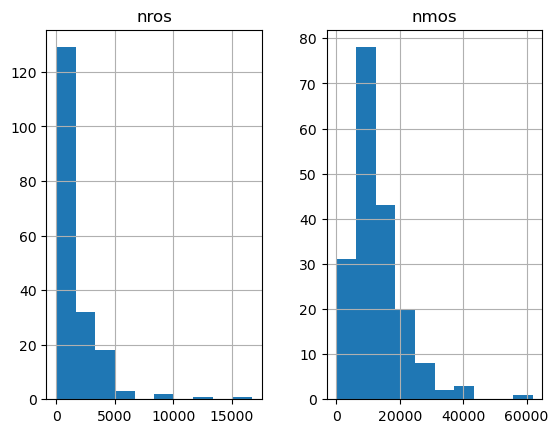

In [46]:
ros_stats.hist()

## Plot data

In [47]:
from ros_database.processing.surface import load_station_metadata

In [48]:
station_gdf = load_station_metadata()

In [49]:
station_gdf

,station_name,latitude,longitude,elevation,record_begins,iem_network,state,country,climate_site,wfo,tzname,ncdc81,ncei91,ugc_county,ugc_zone,county,network,start_year,end_year,geometry
stid,,,,,,,,,,,,,,,,,,,,
PALP,Alpine,70.34430,-150.94470,7.998743,2005-03-01 00:00,AK_ASOS,AK,US,AK3275,AFG,America/Anchorage,USC00502126,USC00500235,AKC185,AKZ203,North Slope,AK_ASOS,2005,2022,POINT (-150.94470 70.34430)
PAFM,AMBLER,67.10631,-157.85747,88.000000,1988-01-05 00:00,AK_ASOS,AK,US,AKTAKN,AFG,America/Anchorage,USC00503212,USC00503212,AKC188,AKZ217,Northwest Arctic,AK_ASOS,1988,2022,POINT (-157.85747 67.10631)
PAKP,ANAKTUVUK PASS,68.13360,-151.74334,643.000000,1980-09-11 00:00,AK_ASOS,AK,US,AK3275,AFG,America/Anchorage,USW00026533,USW00026533,AKC185,AKZ206,Yukon-koyukuk,AK_ASOS,1980,2022,POINT (-151.74334 68.13360)
PANC,ANCHORAGE INTL ARPT (ASOS),61.16972,-150.02611,40.000000,1953-11-01 00:00,AK_ASOS,AK,US,AKTANC,AFC,America/Anchorage,USW00026451,USW00026451,AKC020,AKZ101,Kenai Peninsula,AK_ASOS,1953,2022,POINT (-150.02611 61.16972)
PANV,ANVIK AIRPORT,62.64733,-160.19007,99.000000,1994-12-31 00:00,AK_ASOS,AK,US,AKTAKN,AFG,America/Anchorage,USW00026502,USW00026502,AKC290,AKZ215,Yukon-koyukuk,AK_ASOS,1994,2022,POINT (-160.19007 62.64733)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ESNU,Umea,63.79183,20.28276,14.000000,1977-06-30 00:00,SE__ASOS,NaN,SE,NaN,NaN,Europe/Stockholm,NaN,NaN,NaN,NaN,NaN,SE__ASOS,1977,2022,POINT (20.28276 63.79183)
ESCM,Uppsala,59.89730,17.58860,21.829485,1935-01-01 00:00,SE__ASOS,,SE,NaN,NaN,Europe/Stockholm,NaN,NaN,NaN,NaN,NaN,SE__ASOS,1935,2022,POINT (17.58860 59.89730)
ESOW,Vasteras,59.58944,16.63361,31.000000,1977-06-30 00:00,SE__ASOS,NaN,SE,NaN,NaN,Europe/Stockholm,NaN,NaN,NaN,NaN,NaN,SE__ASOS,1977,2022,POINT (16.63361 59.58944)


<Axes: >

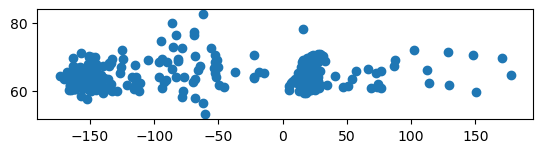

In [50]:
station_gdf.plot()